#**Anomaly Detection & Time Series |**


#Question 1: What is Anomaly Detection? Explain its types (point, contextual, and collective anomalies) with examples.
-

Anomaly Detection is a data analysis technique used to identify unusual patterns, rare events, or observations that deviate significantly from expected behavior. These unusual observations are known as anomalies or outliers. Anomaly detection is widely used in areas such as fraud detection, network security, healthcare monitoring, and fault detection in machines.

In simple terms, anomaly detection helps in finding data points or patterns that do not match normal trends.

There are three main types of anomalies:

1. Point Anomalies  
A point anomaly occurs when a single data instance is significantly different from the rest of the dataset.

Example:  
In credit card transactions, if a user usually spends between ₹1,000 and ₹5,000 per transaction but suddenly makes a transaction of ₹1,50,000, this transaction would be considered a point anomaly because it deviates greatly from normal spending behavior.

2. Contextual Anomalies  
A contextual anomaly occurs when a data point is considered anomalous in a specific context but may be normal in another context. The context can be time, location, season, or other external factors.

Example:  
A temperature of 35°C is normal during summer but would be considered abnormal during winter. So, the same value can be normal or anomalous depending on the context.

3. Collective Anomalies  
A collective anomaly occurs when a group of related data points behaves abnormally together, even if individual data points may appear normal when viewed separately.

Example:  
In network traffic monitoring, one login request is normal. However, thousands of login attempts within a few seconds may indicate a cyberattack like a Distributed Denial of Service (DDoS) attack. Here, the abnormality lies in the collective pattern rather than a single data point.

Conclusion:  
Anomaly detection is an important technique for identifying unusual behavior that may indicate risks, fraud, system failures, or security threats. Understanding point, contextual, and collective anomalies helps in applying the right methods to detect irregular patterns effectively in real-world situations.



# Question 2: Compare Isolation Forest, DBSCAN, and Local Outlier Factor in terms of their approach and suitable use cases.


- Isolation Forest, DBSCAN, and Local Outlier Factor (LOF) are popular techniques used for anomaly detection, but they differ in their approach and ideal use cases.

Isolation Forest is an ensemble-based method that detects anomalies by randomly splitting data using decision trees. The idea is that anomalies are easier to isolate than normal points, so they require fewer splits in the tree structure. It works well with high-dimensional data and large datasets. It is commonly used in fraud detection and system monitoring where speed and scalability are important.

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a clustering algorithm that groups together points that are closely packed and marks points in low-density regions as outliers. It does not require specifying the number of clusters in advance and can find clusters of arbitrary shapes. DBSCAN is suitable for spatial data and situations where anomalies appear in sparse regions, such as detecting unusual geographic patterns.

Local Outlier Factor (LOF) measures how isolated a data point is with respect to the density of its local neighborhood. It compares the local density of a point to that of its neighbors to determine if it is an outlier. LOF is useful when anomalies are defined relative to local regions rather than global patterns, such as detecting unusual customer behavior within specific groups.

In summary, Isolation Forest is best for large and high-dimensional datasets, DBSCAN is effective for density-based clustering and spatial anomalies, and LOF is ideal when detecting local deviations in data density.



# Question 3: What are the key components of a Time Series? Explain each with one example
- A Time Series is a sequence of data points collected or recorded at regular time intervals. Time series data has several key components that help us understand patterns over time.

The first component is Trend. Trend shows the long-term direction of the data, whether it is increasing, decreasing, or staying stable over time. For example, the steady increase in online shopping sales over several years represents an upward trend.

The second component is Seasonality. Seasonality refers to patterns that repeat at regular intervals due to seasonal factors such as months, quarters, or festivals. For example, ice cream sales usually increase during summer every year.

The third component is Cyclical Variation. This represents long-term fluctuations that are not fixed to a specific period and are often influenced by economic or business cycles. For example, company profits may rise during economic growth and fall during a recession.

The fourth component is Irregular Variation. These are random or unpredictable changes caused by unexpected events. For example, a sudden drop in airline bookings due to a natural disaster or pandemic is an irregular variation.

These components together help in understanding and forecasting time series data effectively.

-  

# Question 4: Define Stationary in time series. How can you test and transform a non-stationary series into a stationary one?
-  Answer:

A time series is called stationary when its statistical properties such as mean, variance, and autocorrelation remain constant over time. In a stationary series, there are no trends or seasonal patterns, and the data fluctuates around a constant value.

To test whether a series is stationary, we can use statistical tests like the Augmented Dickey-Fuller (ADF) test. If the p-value is less than 0.05, the series is considered stationary. Visual inspection using plots can also help identify trends or seasonality.

If a series is non-stationary, it can be transformed into a stationary one using techniques like differencing (subtracting the previous value), log transformation (to stabilize variance), or removing trend and seasonality using decomposition methods.



# Question 5: Differentiate between AR, MA, ARIMA, SARIMA, and SARIMAX models in terms of structure and application.
-  Answer:

AR (AutoRegressive) models use past values of the time series to predict future values. It assumes that the current value depends on its previous values. It is useful when the data shows correlation with its own past observations.

MA (Moving Average) models use past forecast errors to make predictions. Instead of past values, it focuses on past mistakes in prediction. It is suitable when random shocks influence the series.

ARIMA (AutoRegressive Integrated Moving Average) combines AR and MA models and also includes differencing (Integrated part) to make a non-stationary series stationary. It is widely used for general time series forecasting without strong seasonal patterns.

SARIMA (Seasonal ARIMA) extends ARIMA by adding seasonal components. It handles data with repeating seasonal patterns, such as monthly sales or yearly temperature trends.

SARIMAX is an extension of SARIMA that includes exogenous (external) variables that may influence the time series. It is useful when outside factors, like promotions or



Question 6: Load a time series dataset (e.g., AirPassengers), plot the original series, and decompose it into trend, seasonality, and residual components
(Include your Python code and output in the code box below.)
-  


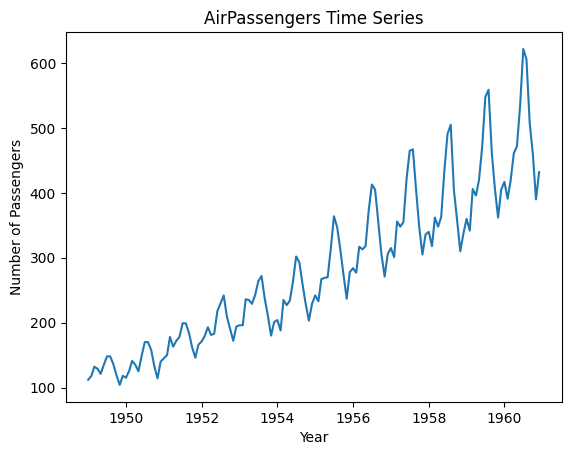

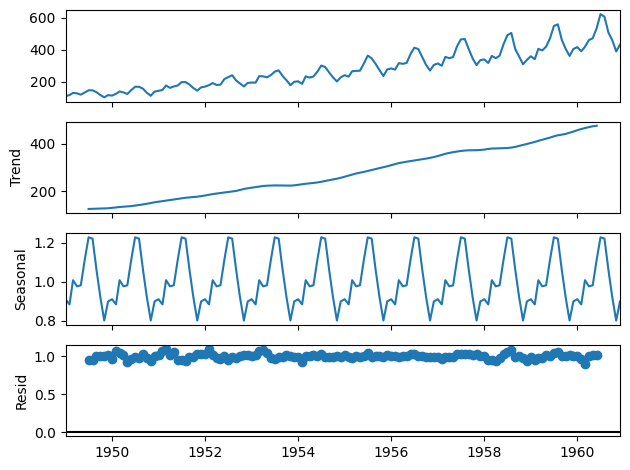

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load dataset
data = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv",
                   parse_dates=['Month'], index_col='Month')

# Plot original time series
plt.figure()
plt.plot(data)
plt.title("AirPassengers Time Series")
plt.xlabel("Year")
plt.ylabel("Number of Passengers")
plt.show()

# Decompose time series
decomposition = seasonal_decompose(data, model='multiplicative')

# Plot decomposition
decomposition.plot()
plt.show()


Question 7: Apply Isolation Forest on a numerical dataset (e.g., NYC Taxi Fare) to detect anomalies. Visualize the anomalies on a 2D scatter plot.
(Include your Python code and output in the code box below.)
-  


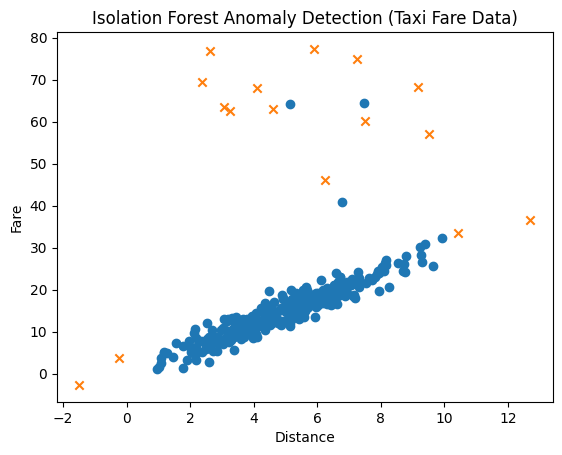

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# -----------------------------
# Create sample taxi fare dataset
# -----------------------------
np.random.seed(42)

# Normal trips
n_normal = 300
distance = np.random.normal(5, 2, n_normal)  # distance in miles
fare = distance * 3 + np.random.normal(0, 2, n_normal)  # fare roughly based on distance

# Add anomalies (unusual high fares)
distance_outliers = np.random.uniform(1, 10, 15)
fare_outliers = np.random.uniform(40, 80, 15)

# Combine data
distance_all = np.concatenate([distance, distance_outliers])
fare_all = np.concatenate([fare, fare_outliers])

df = pd.DataFrame({
    "distance": distance_all,
    "fare": fare_all
})

# -----------------------------
# Apply Isolation Forest
# -----------------------------
model = IsolationForest(contamination=0.05, random_state=42)
df["anomaly"] = model.fit_predict(df)

# -----------------------------
# Visualize anomalies
# -----------------------------
plt.figure()
normal = df[df["anomaly"] == 1]
anomaly = df[df["anomaly"] == -1]

plt.scatter(normal["distance"], normal["fare"])
plt.scatter(anomaly["distance"], anomaly["fare"], marker='x')

plt.title("Isolation Forest Anomaly Detection (Taxi Fare Data)")
plt.xlabel("Distance")
plt.ylabel("Fare")
plt.show()


Question 8: Train a SARIMA model on the monthly airline passengers dataset.Forecast the next 12 months and visualize the results.
(Include your Python code and output in the code box below.)
-


# Question 9: Apply Local Outlier Factor (LOF) on any numerical dataset to detect anomalies and visualize them using matplotlib.
(Include your Python code and output in the code box below.)



/tmp/ipython-input-2026673673.py:21: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(start="1949-01", periods=len(passengers), freq="M")
/tmp/ipython-input-2026673673.py:30: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(start=data.index[-1] + pd.offsets.MonthEnd(), periods=12, freq="M")


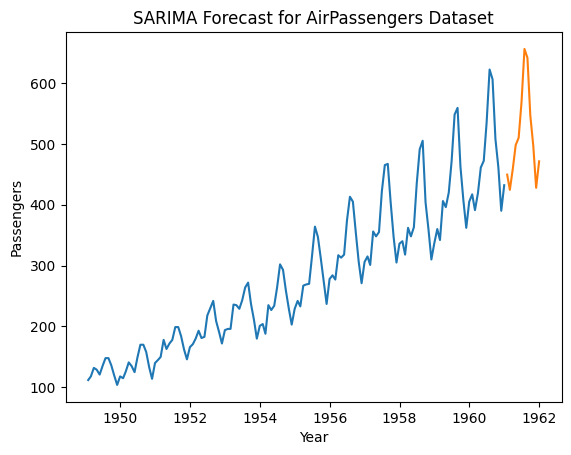

,predicted_mean
1961-01-31,449.330269
1961-02-28,424.386564
1961-03-31,459.033907
1961-04-30,497.865803
1961-05-31,509.863877
1961-06-30,568.258851
1961-07-31,655.811113
1961-08-31,641.191479
1961-09-30,546.393734
1961-10-31,496.801909


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# AirPassengers dataset
passengers = [
    112,118,132,129,121,135,148,148,136,119,104,118,
    115,126,141,135,125,149,170,170,158,133,114,140,
    145,150,178,163,172,178,199,199,184,162,146,166,
    171,180,193,181,183,218,230,242,209,191,172,194,
    196,196,236,235,229,243,264,272,237,211,180,201,
    204,188,235,227,234,264,302,293,259,229,203,229,
    242,233,267,269,270,315,364,347,312,274,237,278,
    284,277,317,313,318,374,413,405,355,306,271,306,
    315,301,356,348,355,422,465,467,404,347,305,336,
    340,318,362,348,363,435,491,505,404,359,310,337,
    360,342,406,396,420,472,548,559,463,407,362,405,
    417,391,419,461,472,535,622,606,508,461,390,432
]

dates = pd.date_range(start="1949-01", periods=len(passengers), freq="M")
data = pd.Series(passengers, index=dates)

# Train SARIMA model
model = SARIMAX(data, order=(1,1,1), seasonal_order=(1,1,1,12))
results = model.fit(disp=False)

# Forecast next 12 months
forecast = results.forecast(steps=12)
forecast_dates = pd.date_range(start=data.index[-1] + pd.offsets.MonthEnd(), periods=12, freq="M")

# Plot original data and forecast
plt.figure()
plt.plot(data)
plt.plot(forecast_dates, forecast)
plt.title("SARIMA Forecast for AirPassengers Dataset")
plt.xlabel("Year")
plt.ylabel("Passengers")
plt.show()

forecast
